In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic

# Load the dataset
file_path = "C://Users//prate//Downloads//mcdonalds.csv" # Update with actual path
df = pd.read_csv(file_path)

In [2]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [4]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
df.shape

(1453, 15)

In [6]:
df.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [7]:
df.groupby('Gender').value_counts()

Gender  yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  healthy  disgusting  Like          Age  VisitFrequency       
Female  Yes    Yes         No     Yes        No      Yes   Yes    Yes    No         No       No          +4            38   Once a month             3
        No     Yes         No     Yes        Yes     Yes   Yes    No     No         No       Yes         I hate it!-5  59   Never                    3
        Yes    Yes         No     Yes        Yes     Yes   Yes    Yes    No         No       No          I love it!+5  18   Once a week              2
        No     No          No     Yes        Yes     Yes   Yes    No     No         No       Yes         -4            64   Never                    2
        Yes    Yes         No     Yes        Yes     Yes   Yes    Yes    No         No       No          +4            30   Once a month             2
                                                                                                   

In [8]:
df_numeric = df.select_dtypes(include=[np.number])

In [9]:
p_mean = df_numeric.mean()
print("Column Means:", p_mean.round(2))

Column Means: Age    44.6
dtype: float64


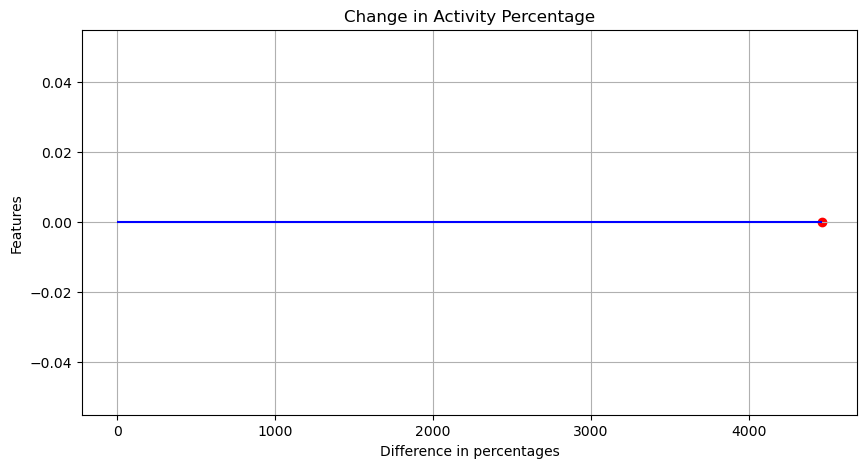

In [10]:
p_diff = p_mean.sort_values()
plt.figure(figsize=(10, 5))
plt.hlines(range(len(p_diff)), 0, p_diff * 100, color='blue')
plt.scatter(p_diff * 100, range(len(p_diff)), color='red')
plt.xlabel("Difference in percentages")
plt.ylabel("Features")
plt.title("Change in Activity Percentage")
plt.grid()
plt.show()

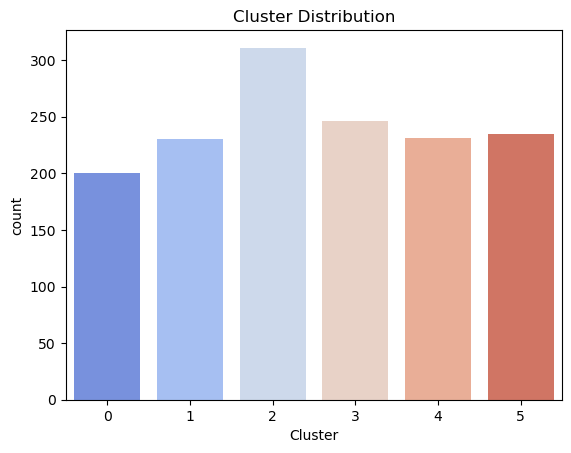

In [11]:
kmeans = KMeans(n_clusters=6, random_state=1234, n_init=20)
df_numeric['Cluster'] = kmeans.fit_predict(df_numeric)
sns.countplot(x=df_numeric['Cluster'], palette='coolwarm')
plt.title("Cluster Distribution")
plt.show()

In [12]:
size = df_numeric['Cluster'].value_counts().values.reshape(1, -1)
chi2, p, dof, expected = chi2_contingency(size)
print(f"Chi-Square Test: X-squared = {chi2}, df = {dof}, p-value = {p}")

Chi-Square Test: X-squared = 0.0, df = 0, p-value = 1.0


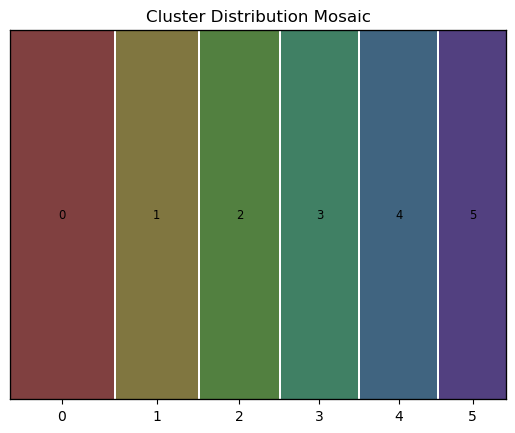

In [13]:
# Mosaic plot
cluster_labels = {str(k): v for k, v in enumerate(size.flatten())}
mosaic(cluster_labels, title='Cluster Distribution Mosaic')
plt.show()
